In [1]:
from mtcnn.utils.tensorflow import set_gpu_memory_growth

2024-09-27 07:11:54.049378: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 07:11:54.059269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 07:11:54.071274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 07:11:54.075027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 07:11:54.083591: I tensorflow/core/platform/cpu_feature_guar

In [2]:
set_gpu_memory_growth()

In [62]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)

In [4]:
import tensorflow as tf

L = tf.keras.layers
M = tf.keras.models

In [5]:
def build_pnet(permutations=True):
    inp = L.Input((None, None, 3), name="input1")

    layer = L.Permute((2, 1, 3))(inp) if permutations else inp
    layer = L.Conv2D(10, kernel_size=(3,3), strides=(1,1), padding="valid", activation="linear", name="conv1")(layer)
    layer = L.PReLU(shared_axes=[1, 2], name="prelu1")(layer)
    layer = L.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same", name="maxpooling1")(layer)
        
    layer = L.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding="valid", activation="linear", name="conv2")(layer)
    layer = L.PReLU(shared_axes=[1, 2], name="prelu2")(layer)
    
    layer = L.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="valid", activation="linear", name="conv3")(layer)
    layer_middle = L.PReLU(shared_axes=[1, 2], name="prelu3")(layer)
    
    layer_out1 = L.Conv2D(4, kernel_size=(1,1), strides=(1,1), padding="valid", activation="linear", name="conv4-1")(layer_middle)
    layer_out1 = L.Permute((2, 1, 3))(layer_out1) if permutations else layer_out1
    
    layer_out2 = L.Conv2D(2, kernel_size=(1,1), strides=(1,1), padding="valid", activation="softmax", name="conv4-2")(layer_middle)
    layer_out2 = L.Permute((2, 1, 3))(layer_out2) if permutations else layer_out2
    
    pnet = M.Model(inp, [layer_out1, layer_out2])
    return pnet

pnet = build_pnet(permutations=False)
pnet.summary()

2024-09-27 07:16:25.667832: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46598 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:65:00.0, compute capability: 8.6
2024-09-27 07:16:25.668311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7445 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:17:00.0, compute capability: 6.1


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer) │ (None, None,      │          0 │ -                 │
│                     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, None,      │        280 │ input1[0][0]      │
│                     │ None, 10)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prelu1 (PReLU)      │ (None, None,      │         10 │ conv1[0][0]       │
│                     │ None, 10)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpooling1         │ (None, None,      │          0 │ prelu1[0][0]      │
│ (MaxPooling2D)      │ None, 10)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2 (Conv2D)      │ (None, None,      │      1,456 │ maxpooling1[0][0] │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prelu2 (PReLU)      │ (None, None,      │         16 │ conv2[0][0]       │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3 (Conv2D)      │ (None, None,      │      4,640 │ prelu2[0][0]      │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prelu3 (PReLU)      │ (None, None,      │         32 │ conv3[0][0]       │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4-1 (Conv2D)    │ (None, None,      │        132 │ prelu3[0][0]      │
│                     │ None, 4)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4-2 (Conv2D)    │ (None, None,      │         66 │ prelu3[0][0]      │
│                     │ None, 2)          │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,632 (25.91 KB)

 Trainable params: 6,632 (25.91 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import numpy as np
weights = np.load("mtcnn_weights.npy", allow_pickle=True)[True][0]
def offload_weights(weights_dict, order=None, broadcast_shapes=None):
    result = []
    if order is None:
        order = list(weights_dict.keys())

    if broadcast_shapes is None:
        broadcast_shapes = []
    
    for k in order:
        v = weights_dict[k]
        
        for sub_k, sub_v in v.items():
            result.append(sub_v)

    for i, shape in enumerate(broadcast_shapes):
        result[i] = np.broadcast_to(result[i], shape)
        
    return result

In [7]:
pnet_weights = offload_weights(weights['PNet'], 
                               order=["conv1", "prelu1", "conv2", "prelu2", "conv3", "prelu3", "conv4-2", "conv4-1"],
                               broadcast_shapes=[w.shape for w in pnet.get_weights()])

In [8]:
pnet.set_weights(pnet_weights)

In [42]:
import joblib

pnet_weights2 = joblib.load("mtcnn/assets/weights/pnet.lz4")
pnet.set_weights(pnet_weights2)

In [11]:
class StageStatus(object):
    """
    Keeps status between MTCNN stages
    """
    def __init__(self, pad_result: tuple=None, width=0, height=0):
        self.width = width
        self.height = height
        self.dy = self.edy = self.dx = self.edx = self.y = self.ey = self.x = self.ex = self.tmpw = self.tmph = []

        if pad_result is not None:
            self.update(pad_result)

    def update(self, pad_result: tuple):
        s = self
        s.dy, s.edy, s.dx, s.edx, s.y, s.ey, s.x, s.ex, s.tmpw, s.tmph = pad_result

In [72]:
import cv2
import numpy as np

def compute_scale_pyramid(m, min_layer, scale_factor=0.709):
    scales = []
    factor_count = 0

    while min_layer >= 12:
        scales += [m * np.power(scale_factor, factor_count)]
        min_layer = min_layer * scale_factor
        factor_count += 1

    return scales

'''def scale_image(image, scale: float):
    """
    Scales the image to a given scale.
    :param image:
    :param scale:
    :return:
    """
    height, width, _ = image.shape

    width_scaled = int(np.ceil(width * scale))
    height_scaled = int(np.ceil(height * scale))

    im_data = cv2.resize(image, (width_scaled, height_scaled), interpolation=cv2.INTER_AREA)

    # Normalize the image's pixels
    im_data_normalized = (im_data - 127.5) * 0.0078125

    return im_data_normalized
'''
import tensorflow as tf

def scale_image(image, scale: float):
    """
    Escala la imagen al tamaño proporcionado.
    :param image: Imagen en formato de tensor.
    :param scale: Factor de escala.
    :return: Imagen escalada y normalizada.
    """
    # Obtener las dimensiones de la imagen
    height, width, _ = image.shape

    # Calcular nuevas dimensiones
    width_scaled = int(tf.math.ceil(width * scale))
    height_scaled = int(tf.math.ceil(height * scale))

    # Escalar la imagen usando TensorFlow
    image_scaled = tf.image.resize(image, [height_scaled, width_scaled], method=tf.image.ResizeMethod.AREA)

    # Normalizar la imagen
    image_normalized = (image_scaled - 127.5) * 0.0078125

    return image_normalized

def generate_bounding_box(imap, reg, scale, t):

    # use heatmap to generate bounding boxes
    stride = 2
    cellsize = 12

    imap = np.transpose(imap)
    dx1 = np.transpose(reg[:, :, 0])
    dy1 = np.transpose(reg[:, :, 1])
    dx2 = np.transpose(reg[:, :, 2])
    dy2 = np.transpose(reg[:, :, 3])

    y, x = np.where(imap >= t)

    if y.shape[0] == 1:
        dx1 = np.flipud(dx1)
        dy1 = np.flipud(dy1)
        dx2 = np.flipud(dx2)
        dy2 = np.flipud(dy2)

    score = imap[(y, x)]
    reg = np.transpose(np.vstack([dx1[(y, x)], dy1[(y, x)], dx2[(y, x)], dy2[(y, x)]]))

    if reg.size == 0:
        reg = np.empty(shape=(0, 3))

    bb = np.transpose(np.vstack([y, x]))

    q1 = np.fix((stride * bb + 1)/scale)
    q2 = np.fix((stride * bb + cellsize)/scale)
    boundingbox = np.hstack([q1, q2, np.expand_dims(score, 1), reg])

    return boundingbox, reg

def nms(boxes, threshold, method):
    """
    Non Maximum Suppression.

    :param boxes: np array with bounding boxes.
    :param threshold:
    :param method: NMS method to apply. Available values ('Min', 'Union')
    :return:
    """
    if boxes.size == 0:
        return np.empty((0, 3))

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    s = boxes[:, 4]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    sorted_s = np.argsort(s)

    pick = np.zeros_like(s, dtype=np.int16)
    counter = 0
    while sorted_s.size > 0:
        i = sorted_s[-1]
        pick[counter] = i
        counter += 1
        idx = sorted_s[0:-1]

        xx1 = np.maximum(x1[i], x1[idx])
        yy1 = np.maximum(y1[i], y1[idx])
        xx2 = np.minimum(x2[i], x2[idx])
        yy2 = np.minimum(y2[i], y2[idx])

        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)

        inter = w * h

        if method == 'Min':
            o = inter / np.minimum(area[i], area[idx])
        else:
            o = inter / (area[i] + area[idx] - inter)

        sorted_s = sorted_s[np.where(o <= threshold)]

    pick = pick[0:counter]

    return pick

def pad(total_boxes, w, h):
    # compute the padding coordinates (pad the bounding boxes to square)
    tmpw = (total_boxes[:, 2] - total_boxes[:, 0] + 1).astype(np.int32)
    tmph = (total_boxes[:, 3] - total_boxes[:, 1] + 1).astype(np.int32)
    numbox = total_boxes.shape[0]

    dx = np.ones(numbox, dtype=np.int32)
    dy = np.ones(numbox, dtype=np.int32)
    edx = tmpw.copy().astype(np.int32)
    edy = tmph.copy().astype(np.int32)

    x = total_boxes[:, 0].copy().astype(np.int32)
    y = total_boxes[:, 1].copy().astype(np.int32)
    ex = total_boxes[:, 2].copy().astype(np.int32)
    ey = total_boxes[:, 3].copy().astype(np.int32)

    tmp = np.where(ex > w)
    edx.flat[tmp] = np.expand_dims(-ex[tmp] + w + tmpw[tmp], 1)
    ex[tmp] = w

    tmp = np.where(ey > h)
    edy.flat[tmp] = np.expand_dims(-ey[tmp] + h + tmph[tmp], 1)
    ey[tmp] = h

    tmp = np.where(x < 1)
    dx.flat[tmp] = np.expand_dims(2 - x[tmp], 1)
    x[tmp] = 1

    tmp = np.where(y < 1)
    dy.flat[tmp] = np.expand_dims(2 - y[tmp], 1)
    y[tmp] = 1

    return dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph

def rerec(bbox):
    # convert bbox to square
    h = bbox[:, 3] - bbox[:, 1]
    w = bbox[:, 2] - bbox[:, 0]
    l = np.maximum(w, h)
    bbox[:, 0] = bbox[:, 0] + w * 0.5 - l * 0.5
    bbox[:, 1] = bbox[:, 1] + h * 0.5 - l * 0.5
    bbox[:, 2:4] = bbox[:, 0:2] + np.transpose(np.tile(l, (2, 1)))
    return bbox

def bbreg(boundingbox, reg):
    # calibrate bounding boxes
    if reg.shape[1] == 1:
        reg = np.reshape(reg, (reg.shape[2], reg.shape[3]))

    w = boundingbox[:, 2] - boundingbox[:, 0] + 1
    h = boundingbox[:, 3] - boundingbox[:, 1] + 1
    b1 = boundingbox[:, 0] + reg[:, 0] * w
    b2 = boundingbox[:, 1] + reg[:, 1] * h
    b3 = boundingbox[:, 2] + reg[:, 2] * w
    b4 = boundingbox[:, 3] + reg[:, 3] * h
    boundingbox[:, 0:4] = np.transpose(np.vstack([b1, b2, b3, b4]))
    return boundingbox


In [48]:
def stage1(image, scales: list, stage_status: StageStatus, threshold=0.6):
    """    First stage of the MTCNN.    :param image:    :param scales:    :param stage_status:    :return:    """    
    total_boxes = np.empty((0, 9))
    status = stage_status

    for scale in scales:
        scaled_image = scale_image(image, scale)

        img_x = np.expand_dims(scaled_image, 0)
        img_y = img_x
        #img_y = np.transpose(img_x, (0, 2, 1, 3))

        out = pnet(img_y)

        #out0 = np.transpose(out[0], (0, 2, 1, 3))
        #out1 = np.transpose(out[1], (0, 2, 1, 3))
        out0 = out[0].numpy()
        out1 = out[1].numpy()


        boxes, _ = generate_bounding_box(out1[0, :, :, 1].copy(), 
                                         out0[0, :, :, :].copy(), scale, threshold)

        # inter-scale nms        
        pick = nms(boxes.copy(), 0.5, 'Union')
        if boxes.size > 0 and pick.size > 0:
            boxes = boxes[pick, :]
            total_boxes = np.append(total_boxes, boxes, axis=0)

    numboxes = total_boxes.shape[0]

    if numboxes > 0:
        pick = nms(total_boxes.copy(), 0.7, 'Union')
        total_boxes = total_boxes[pick, :]

        regw = total_boxes[:, 2] - total_boxes[:, 0]
        regh = total_boxes[:, 3] - total_boxes[:, 1]

        qq1 = total_boxes[:, 0] + total_boxes[:, 5] * regw
        qq2 = total_boxes[:, 1] + total_boxes[:, 6] * regh
        qq3 = total_boxes[:, 2] + total_boxes[:, 7] * regw
        qq4 = total_boxes[:, 3] + total_boxes[:, 8] * regh

        total_boxes = np.transpose(np.vstack([qq1, qq2, qq3, qq4, total_boxes[:, 4]]))
        total_boxes = rerec(total_boxes.copy())

        total_boxes[:, 0:4] = np.fix(total_boxes[:, 0:4]).astype(np.int32)
        status = StageStatus(pad(total_boxes.copy(), stage_status.width, stage_status.height), 
                             width=stage_status.width, height=stage_status.height)

    return total_boxes, status

In [73]:
from mtcnn.utils.images import load_image

In [74]:
img = load_image("example.jpg")

In [97]:
img.shape

(1390, 1300, 3)

In [93]:
height, width

(1390, 1300)

In [75]:
if img is None or not hasattr(img, "shape"):
    raise Exception("Image not valid.")

height, width, _ = img.shape
stage_status = StageStatus(width=width, height=height)

m = 12 / 20
min_layer = np.amin([height, width]) * m

scales = compute_scale_pyramid(m, min_layer)

print(scales)
#stages = [self.__stage1, self.__stage2, self.__stage3]
result = [scales, stage_status]

[0.6, 0.42539999999999994, 0.30160859999999995, 0.21384049739999997, 0.15161291265659996, 0.10749355507352938, 0.07621293054713231, 0.054034967757916816, 0.038310792140363016, 0.02716235162751738, 0.01925810730390982, 0.013653998078472061, 0.00968068463763669]


In [106]:
len(scales)

13

In [76]:
# DO ONE BY ONE

In [115]:
image = img
scales = scales
stage_status = stage_status
threshold=0.6

total_boxes = np.empty((0, 9))
status = stage_status

scaled_input = []
predictions = []
result = []

for scale in scales:
    scaled_image = scale_image(image, round(scale, 4))

    img_x = np.expand_dims(scaled_image, 0)
    img_y = img_x
    #img_y = np.transpose(img_x, (0, 2, 1, 3))

    out = pnet(img_y)
    scaled_input.append(scaled_image)
    predictions.append(out)

    #out0 = np.transpose(out[0], (0, 2, 1, 3))
    #out1 = np.transpose(out[1], (0, 2, 1, 3))
    #out0 = out[0].numpy()
    #out1 = out[1].numpy()


    #boxes, _ = generate_bounding_box(out1[0, :, :, 1].copy(), 
    #                                 out0[0, :, :, :].copy(), scale, threshold)
    #result.append(boxes)

In [113]:
round(scale, 5)

0.00968

In [116]:
[i.shape for i in scaled_input]

[TensorShape([834, 780, 3]),
 TensorShape([592, 554, 3]),
 TensorShape([420, 393, 3]),
 TensorShape([298, 278, 3]),
 TensorShape([211, 198, 3]),
 TensorShape([150, 140, 3]),
 TensorShape([106, 100, 3]),
 TensorShape([76, 71, 3]),
 TensorShape([54, 50, 3]),
 TensorShape([38, 36, 3]),
 TensorShape([27, 26, 3]),
 TensorShape([20, 18, 3]),
 TensorShape([14, 13, 3])]

In [108]:
scaled_input[0].shape

TensorShape([834, 780, 3])

In [96]:
img_y.shape

(1, 14, 13, 3)

In [104]:
predictions[-4][0].shape

TensorShape([1, 14, 13, 4])

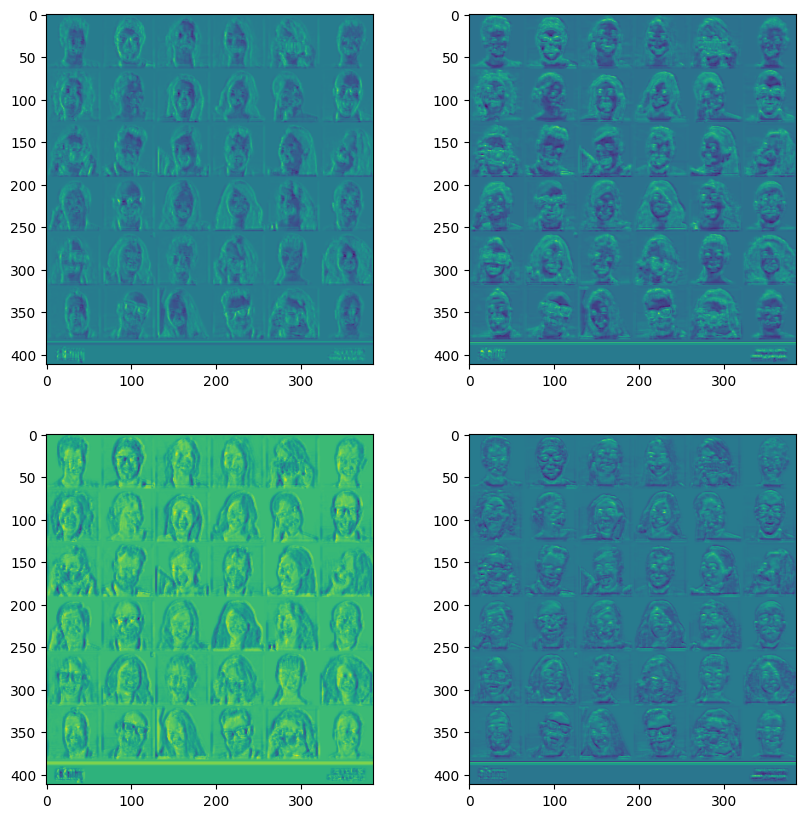

In [92]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
plt.subplot(221)
plt.imshow(predictions[0][0][0,:,:,0])
plt.subplot(222)
plt.imshow(predictions[0][0][0,:,:,1])
plt.subplot(223)
plt.imshow(predictions[0][0][0,:,:,2])
plt.subplot(224)
plt.imshow(predictions[0][0][0,:,:,3])

In [78]:
for b in result:
    print(b.shape)

(802, 9)
(645, 9)
(495, 9)
(599, 9)
(630, 9)
(471, 9)
(303, 9)
(131, 9)
(40, 9)
(3, 9)
(1, 9)
(0, 8)
(0, 8)


In [71]:
result[0]

array([[  38.     ,  305.     ,   56.     , ...,   -0.02888,   -0.05096,
           0.03519],
       [  38.     ,  308.     ,   56.     , ...,   -0.07679,   -0.09897,
           0.02963],
       [  38.     ,  351.     ,   56.     , ...,   -0.04106,   -0.03963,
          -0.0205 ],
       ...,
       [1268.     , 1001.     , 1286.     , ...,   -0.10949,   -0.13162,
           0.07499],
       [1268.     , 1005.     , 1286.     , ...,   -0.16581,   -0.10757,
           0.04302],
       [1268.     , 1008.     , 1286.     , ...,   -0.14603,   -0.16071,
          -0.02939]])

In [70]:
result[0]

array([[  38.     ,  305.     ,   56.     , ...,   -0.02888,   -0.05096,
           0.03519],
       [  38.     ,  308.     ,   56.     , ...,   -0.07679,   -0.09897,
           0.02963],
       [  38.     ,  351.     ,   56.     , ...,   -0.04106,   -0.03963,
          -0.0205 ],
       ...,
       [1268.     , 1001.     , 1286.     , ...,   -0.10949,   -0.13162,
           0.07499],
       [1268.     , 1005.     , 1286.     , ...,   -0.16581,   -0.10757,
           0.04302],
       [1268.     , 1008.     , 1286.     , ...,   -0.14603,   -0.16071,
          -0.02939]])

In [ ]:
    # inter-scale nms        
    pick = nms(boxes.copy(), 0.5, 'Union')
    if boxes.size > 0 and pick.size > 0:
        boxes = boxes[pick, :]
        total_boxes = np.append(total_boxes, boxes, axis=0)

In [ ]:
numboxes = total_boxes.shape[0]

if numboxes > 0:
    pick = nms(total_boxes.copy(), 0.7, 'Union')
    total_boxes = total_boxes[pick, :]

    regw = total_boxes[:, 2] - total_boxes[:, 0]
    regh = total_boxes[:, 3] - total_boxes[:, 1]

    qq1 = total_boxes[:, 0] + total_boxes[:, 5] * regw
    qq2 = total_boxes[:, 1] + total_boxes[:, 6] * regh
    qq3 = total_boxes[:, 2] + total_boxes[:, 7] * regw
    qq4 = total_boxes[:, 3] + total_boxes[:, 8] * regh

    total_boxes = np.transpose(np.vstack([qq1, qq2, qq3, qq4, total_boxes[:, 4]]))
    total_boxes = rerec(total_boxes.copy())

    total_boxes[:, 0:4] = np.fix(total_boxes[:, 0:4]).astype(np.int32)
    status = StageStatus(pad(total_boxes.copy(), stage_status.width, stage_status.height), 
                         width=stage_status.width, height=stage_status.height)

return total_boxes, status

In [65]:
# / DO ONE BY ONE

In [ ]:
# We pipe here each of the stagesfor stage in stages:
result = stage1(img, result[0], result[1])

In [58]:
result[0].shape

(1587, 5)

In [60]:
result

(array([[ 281.     ,  921.     ,  387.     , 1027.     ,    1.     ],
        [ 490.     ,  279.     ,  604.     ,  392.     ,    1.     ],
        [  68.     ,  276.     ,  166.     ,  373.     ,    1.     ],
        ...,
        [ 701.     ,  906.     ,  763.     ,  968.     ,    0.60079],
        [1100.     ,  942.     , 1121.     ,  962.     ,    0.60026],
        [ 742.     , 1186.     ,  933.     , 1377.     ,    0.60018]]),
 <__main__.StageStatus at 0x7f8d933a1510>)

In [59]:
result_bak

array([[ 490.     ,  279.     ,  604.     ,  392.     ,    1.     ],
       [ 281.     ,  921.     ,  387.     , 1027.     ,    1.     ],
       [  68.     ,  276.     ,  166.     ,  373.     ,    1.     ],
       ...,
       [1173.     ,  972.     , 1206.     , 1005.     ,    0.60094],
       [1100.     ,  942.     , 1121.     ,  962.     ,    0.60084],
       [ 742.     , 1186.     ,  933.     , 1377.     ,    0.60018]])

In [41]:
result[0]

array([[ 490.     ,  279.     ,  604.     ,  392.     ,    1.     ],
       [ 281.     ,  921.     ,  387.     , 1027.     ,    1.     ],
       [  68.     ,  276.     ,  166.     ,  373.     ,    1.     ],
       ...,
       [1173.     ,  972.     , 1206.     , 1005.     ,    0.60094],
       [1100.     ,  942.     , 1121.     ,  962.     ,    0.60084],
       [ 742.     , 1186.     ,  933.     , 1377.     ,    0.60018]])